IMPORT MODULE

In [124]:
import pandas as pd
import numpy as npt
import seaborn as sns
from matplotlib import pyplot as plt
import statistics as stat
from scipy.stats import shapiro
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.sandbox.stats.runs import runstest_1samp

STORE DATA

In [125]:
#INFLASI UMUM
df_inflasi = pd.read_csv('./fix_dataset/Data Inflasi 2003 - 2022.csv')
df_inflasi_2023 = pd.read_csv('./fix_dataset/Data Inflasi 2023.csv')
#INFLASI PENDIDIKAN
df_ip_pendidikan_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Pendidikan.csv', header=[0], index_col=[0])
df_ip_pendidikan_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Pendidikan.csv', header=[0], index_col=[0])

df_ip_menengah_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Menengah.csv', header=[0], index_col=[0])
df_ip_menengah_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Menengah.csv', header=[0], index_col=[0])
df_ip_menengah_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Menengah.csv', header=[0], index_col=[0])
df_ip_menengah_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Menengah.csv', header=[0], index_col=[0])

df_ip_tinggi_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Tinggi.csv', header=[0], index_col=[0])
df_ip_tinggi_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Tinggi.csv', header=[0], index_col=[0])
df_ip_tinggi_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Tinggi.csv', header=[0], index_col=[0])
df_ip_tinggi_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Tinggi.csv', header=[0], index_col=[0])

df_ip_lainnya_2020 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2020-Lainnya.csv', header=[0], index_col=[0])
df_ip_lainnya_2021 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2021-Lainnya.csv', header=[0], index_col=[0])
df_ip_lainnya_2022 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2022-Lainnya.csv', header=[0], index_col=[0])
df_ip_lainnya_2023 = pd.read_csv('./fix_dataset/dataset_InflasiPendidikan/Inflasi Pendidikan 2023-Lainnya.csv', header=[0], index_col=[0])



In [126]:

# #INFLASI TAHUN KALENDER PENDIDIKAN
# df_tp_kurpel_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Pendidikan.csv')
# df_tp_perlengkapan_2014 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2014-Perlengkapan.csv')

# df_tp_kurpel_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Pendidikan.csv')
# df_tp_perlengkapan_2015 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2015-Perlengkapan.csv')

# df_tp_kurpel_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Pendidikan.csv')
# df_tp_perlengkapan_2016 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2016-Perlengkapan.csv')

# df_tp_kurpel_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Pendidikan.csv')
# df_tp_perlengkapan_2017 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2017-Perlengkapan.csv')

# df_tp_kurpel_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Pendidikan.csv')
# df_tp_perlengkapan_2018 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2018-Perlengkapan.csv')

# df_tp_kurpel_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Kursus-Kepelatihan.csv')
# df_tp_pendidikan_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Pendidikan.csv')
# df_tp_perlengkapan_2019 = pd.read_csv('./fix_dataset/dataset-InflasiTahunPendidikan/Inflasi Tahun Pendidikan 2019-Perlengkapan.csv')

# DATA CLEANING

* DATA INFLASI UMUM

In [127]:
df_inflasi.head()

,Month,Inflasi
0,12/01/2022,5.51 %
1,11/01/2022,5.42 %
2,10/01/2022,5.71 %
3,09/01/2022,5.95 %
4,08/01/2022,4.69 %


In [128]:
#Clean data, object->date and float
df_inflasi["Inflasi"] = df_inflasi["Inflasi"].str.replace(" %", "")
df_inflasi["Inflasi"] = pd.to_numeric(df_inflasi["Inflasi"], errors="coerce")
df_inflasi['Inflasi'] = df_inflasi['Inflasi'] * 0.01

In [129]:
df_inflasi['Month'] = pd.to_datetime(df_inflasi['Month'], format='%m/%d/%Y')

In [130]:
df_inflasi

,Month,Inflasi
0,2022-12-01,0.0551
1,2022-11-01,0.0542
2,2022-10-01,0.0571
3,2022-09-01,0.0595
4,2022-08-01,0.0469
...,...,...
235,2003-05-01,0.0715
236,2003-04-01,0.0762
237,2003-03-01,0.0717
238,2003-02-01,0.0760


In [131]:
df_inflasi_2023.head()

,Month,Inflasi
0,12/01/2023,2.61 %
1,11/01/2023,2.86 %
2,10/01/2023,2.56 %
3,09/01/2023,2.28 %
4,08/01/2023,3.27 %


In [132]:
#Clean data, object->date and float
df_inflasi_2023["Inflasi"] = df_inflasi_2023["Inflasi"].str.replace(" %", "")
df_inflasi_2023["Inflasi"] = pd.to_numeric(df_inflasi_2023["Inflasi"], errors="coerce")
df_inflasi_2023['Inflasi'] = df_inflasi_2023['Inflasi'] * 0.01

In [133]:
df_inflasi_2023['Month'] = pd.to_datetime(df_inflasi_2023['Month'], format='%m/%d/%Y')

In [134]:
df_inflasi_2023

,Month,Inflasi
0,2023-12-01,0.0261
1,2023-11-01,0.0286
2,2023-10-01,0.0256
3,2023-09-01,0.0228
4,2023-08-01,0.0327
5,2023-07-01,0.0308
6,2023-06-01,0.0352
7,2023-05-01,0.0400
8,2023-04-01,0.0433
9,2023-03-01,0.0497


In [135]:
print('Data Inflasi Umum 2003-2022:\n',df_inflasi.dtypes)
print('Data Inflasi Umum 2023:\n',df_inflasi_2023.dtypes)

Data Inflasi Umum 2003-2022:
 Month      datetime64[ns]
Inflasi           float64
dtype: object
Data Inflasi Umum 2023:
 Month      datetime64[ns]
Inflasi           float64
dtype: object


* DATA INFLASI PENDIDIKAN [PENDIDIKAN]

In [136]:
print('NAN Data:\n',df_ip_pendidikan_2020.isna().sum())
print('Type Data:\n',df_ip_pendidikan_2020.dtypes)

NAN Data:
 01/01/2020    0
01/02/2020    0
01/03/2020    0
01/04/2020    0
01/05/2020    0
01/06/2020    0
01/07/2020    0
01/08/2020    0
01/09/2020    0
01/10/2020    0
01/11/2020    0
01/12/2020    0
dtype: int64
Type Data:
 01/01/2020    float64
01/02/2020    float64
01/03/2020    float64
01/04/2020    float64
01/05/2020    float64
01/06/2020    float64
01/07/2020    float64
01/08/2020    float64
01/09/2020    float64
01/10/2020    float64
01/11/2020    float64
01/12/2020    float64
dtype: object


In [137]:
print('NAN Data:\n',df_ip_pendidikan_2021.isna().sum())
print('Type Data:\n',df_ip_pendidikan_2021.dtypes)

NAN Data:
 01/01/2021    0
01/02/2021    0
01/03/2021    0
01/04/2021    0
01/05/2021    0
01/06/2021    0
01/07/2021    0
01/08/2021    0
01/09/2021    0
01/10/2021    0
01/11/2021    0
01/12/2021    0
dtype: int64
Type Data:
 01/01/2021    float64
01/02/2021    float64
01/03/2021    float64
01/04/2021    float64
01/05/2021    float64
01/06/2021    float64
01/07/2021    float64
01/08/2021    float64
01/09/2021    float64
01/10/2021    float64
01/11/2021    float64
01/12/2021    float64
dtype: object


In [138]:
df_1 = df_ip_pendidikan_2020
df_1.head(91)

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
Kota,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0


* DATA INFLASI PENDIDIKAN
- Melakukan cleaning data inflasi pendidikan
- Melakukan transpose data untuk menjadikan kota sebagai features
- Menggabungkan data inflasi pendidikan pertahun dan per kategori

In [139]:

# df_ip_pendidikan_2020.index = pd.to_datetime(df_ip_pendidikan_2020.index).strftime("%B %Y")
df = df_ip_pendidikan_2020

df.head(91)

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
Kota,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0


In [140]:
# df = df.transpose()
# df['Kota'] = pd.to_datetime(df['Kota'], format='%m/%d/%Y')
# df = df.drop(columns=['01/01/2020'])
# df.columns = df.columns.strftime("%B %Y")
# df.columns
# df = df.drop(3, axis=0, inplace=False)
# df.dtypes

# df.reset_index(inplace=True)
# df = df.drop(columns='index')

# df = df.drop(columns=['01-01-2020'])
# df =df.set_index('Kota')
# df = df.drop(index=['Kota'])


df

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,01/11/2020,01/12/2020
Kota,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,0.00,0.0
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,0.00,0.0
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,0.00,0.0
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,0.00,0.0
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,0.00,0.0
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,0.00,0.0


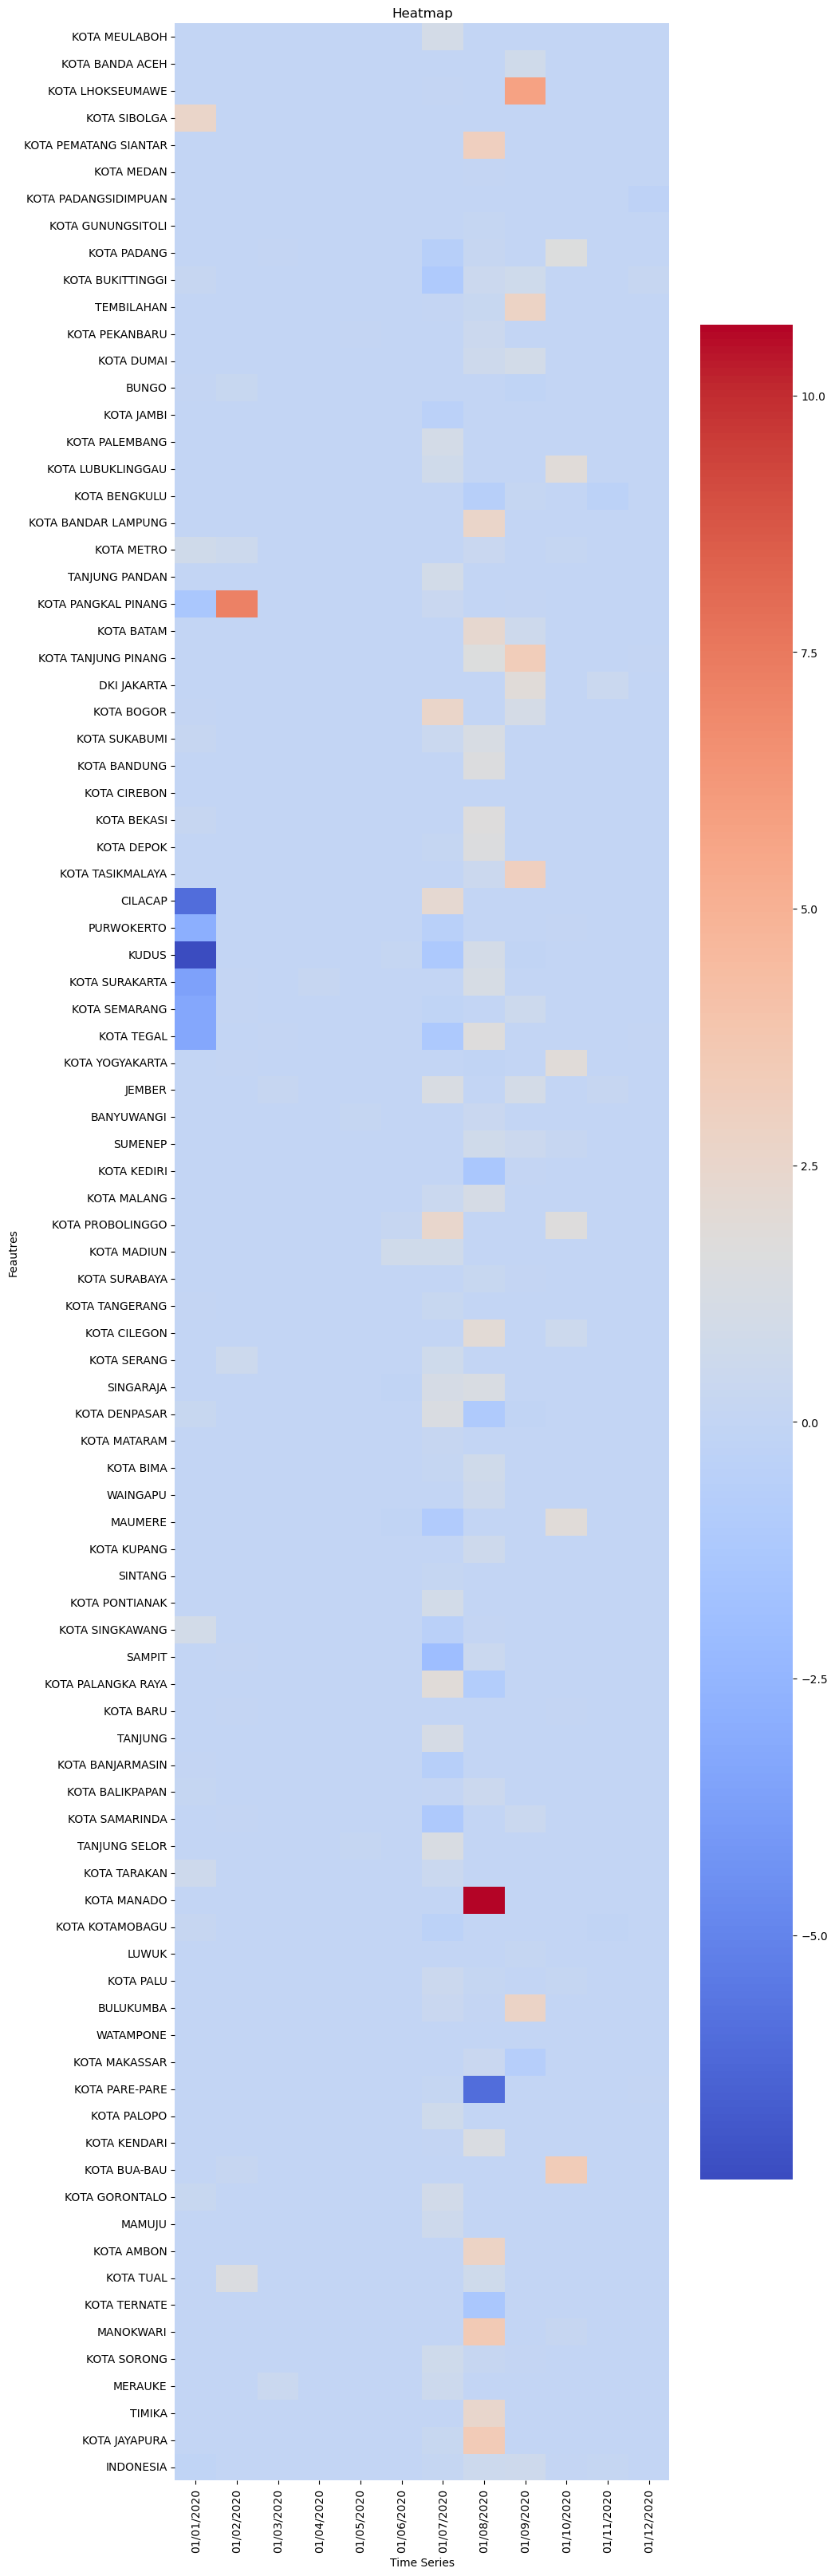

In [141]:
plt.figure(figsize=(10, 40))
sns.heatmap(df, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()


In [142]:
pd_ip_20 = pd.merge(df_ip_pendidikan_2020, df_ip_pendidikan_2021, left_on='Kota', right_on='Kota')
pd_ip_20 = pd_ip_20.rename(columns=lambda x: x.replace('_x', '').replace('_y', ''))
pd_ip_20

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2021,01/04/2021,01/05/2021,01/06/2021,01/07/2021,01/08/2021,01/09/2021,01/10/2021,01/11/2021,01/12/2021
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.14
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,...,0.00,0.00,0.00,0.00,0.24,0.16,0.00,0.00,0.0,0.00
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,...,0.00,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.0,0.00
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,...,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.0,0.00
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,...,1.08,-1.19,0.00,0.97,-0.05,0.00,0.87,0.41,0.0,0.00
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.0,0.00


In [143]:
concatnyaa = pd.concat([df_ip_pendidikan_2020, df_ip_pendidikan_2021], axis=1)
concatnyaa


,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2021,01/04/2021,01/05/2021,01/06/2021,01/07/2021,01/08/2021,01/09/2021,01/10/2021,01/11/2021,01/12/2021
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.00,0.0,0.0,0.0,1.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.14
KOTA BANDA ACEH,0.03,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.76,0.00,...,0.00,0.00,0.00,0.00,0.24,0.16,0.00,0.00,0.0,0.00
KOTA LHOKSEUMAWE,0.00,0.00,0.00,0.0,0.0,0.0,0.07,0.00,5.75,0.00,...,0.00,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.0,0.00
KOTA SIBOLGA,2.58,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
KOTA PEMATANG SIANTAR,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.12,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.00,0.0,0.0,0.0,0.68,0.23,0.07,0.00,...,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.0,0.00
MERAUKE,0.00,0.00,0.45,0.0,0.0,0.0,0.58,0.00,0.00,0.00,...,1.08,-1.19,0.00,0.97,-0.05,0.00,0.87,0.41,0.0,0.00
TIMIKA,0.00,0.00,0.00,0.0,0.0,0.0,0.00,2.49,0.00,0.00,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.0,0.00


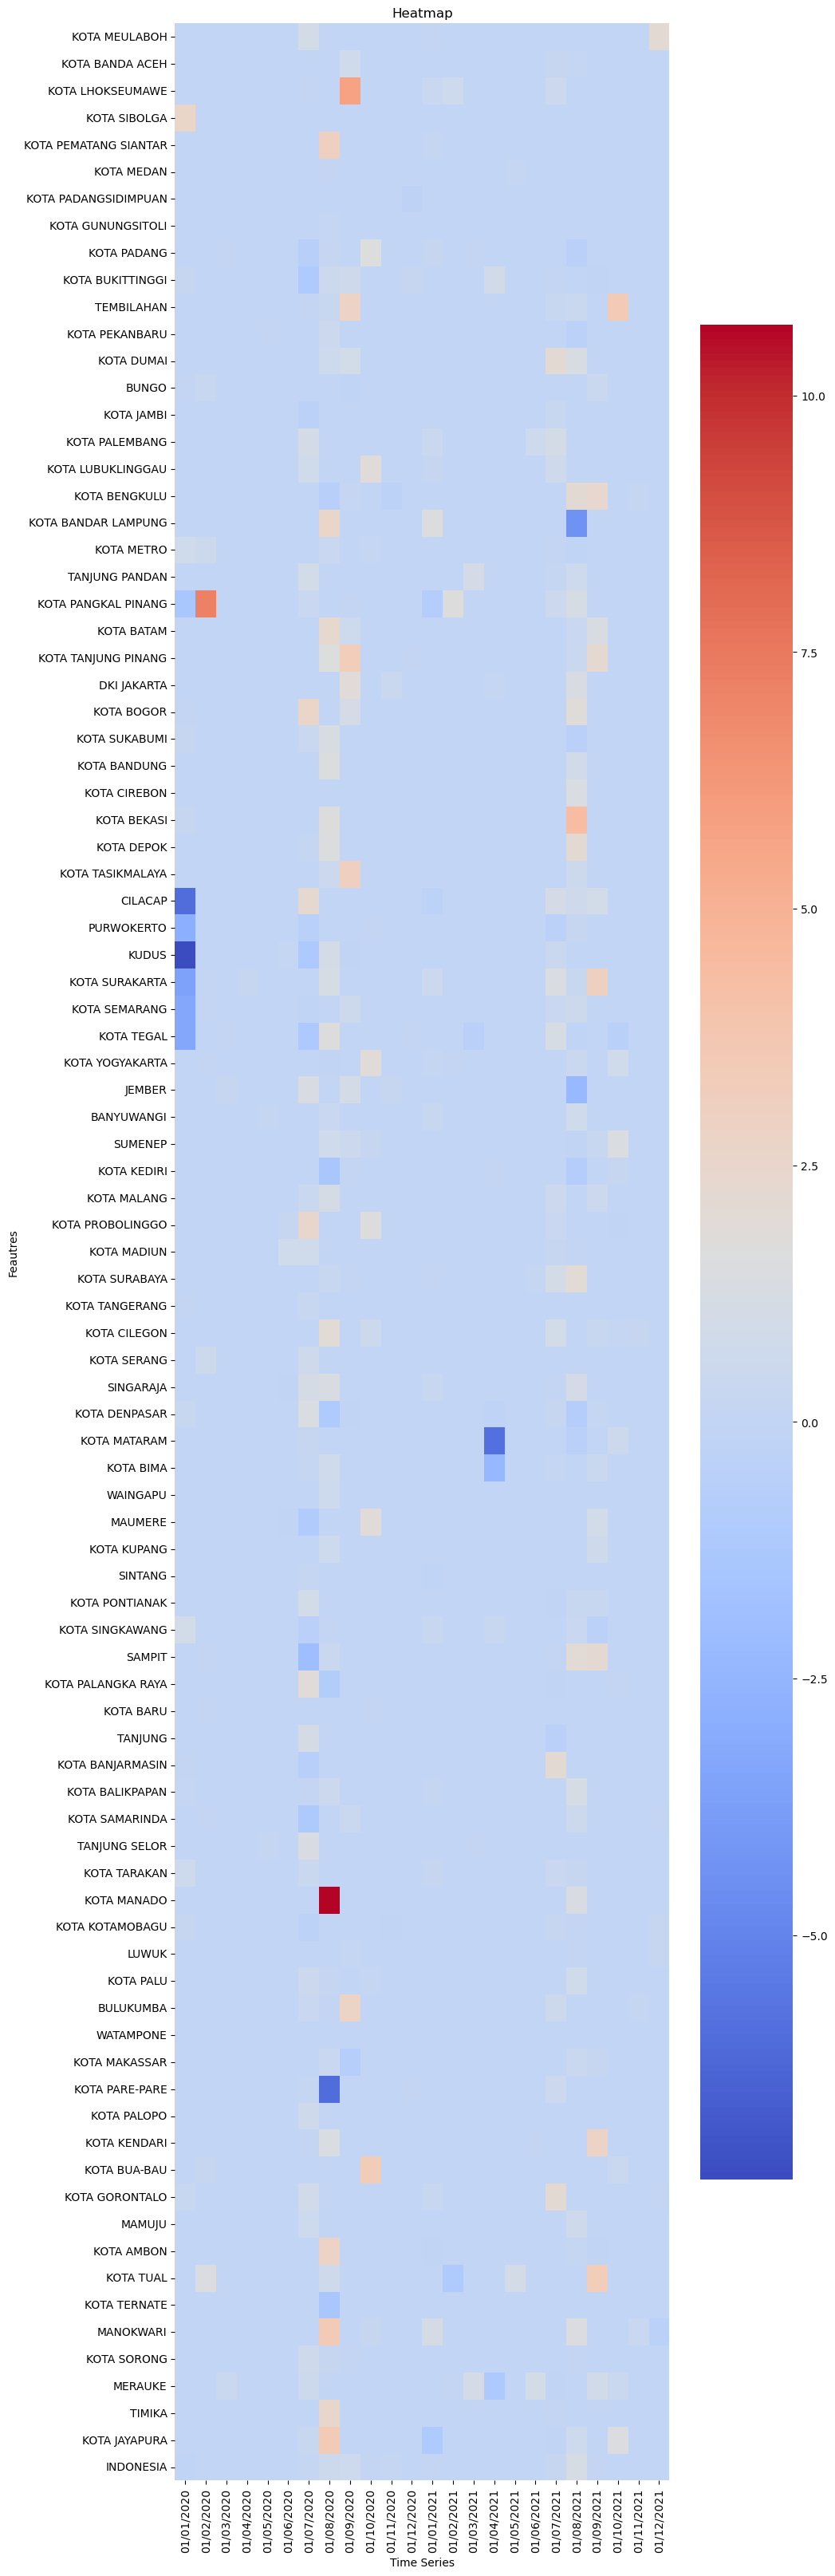

In [144]:
plt.figure(figsize=(10, 40))
sns.heatmap(concatnyaa, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()


# Concat yang pendidikan Tinggi 

In [145]:
df_ip_con_all_tinggi_2020_2023 = pd.concat([df_ip_tinggi_2020,df_ip_tinggi_2021,df_ip_tinggi_2022,df_ip_tinggi_2023],axis=1)
df_ip_con_all_tinggi_2020_2023

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2023,01/04/2023,01/05/2023,01/06/2023,01/07/2023,01/08/2023,01/09/2023,01/10/2023,01/11/2023,01/12/2023
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN
KOTA BANDA ACEH,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.83,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN
KOTA LHOKSEUMAWE,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,1.87,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN
KOTA SIBOLGA,10.52,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,6.53,0.00,0.00,NaN,NaN
KOTA PEMATANG SIANTAR,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,14.46,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.25,0.00,...,0.0,0.0,0.0,0.0,0.00,-1.41,0.00,0.00,NaN,NaN
MERAUKE,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN
TIMIKA,0.00,0.00,0.0,0.0,0.0,0.0,0.00,7.29,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN


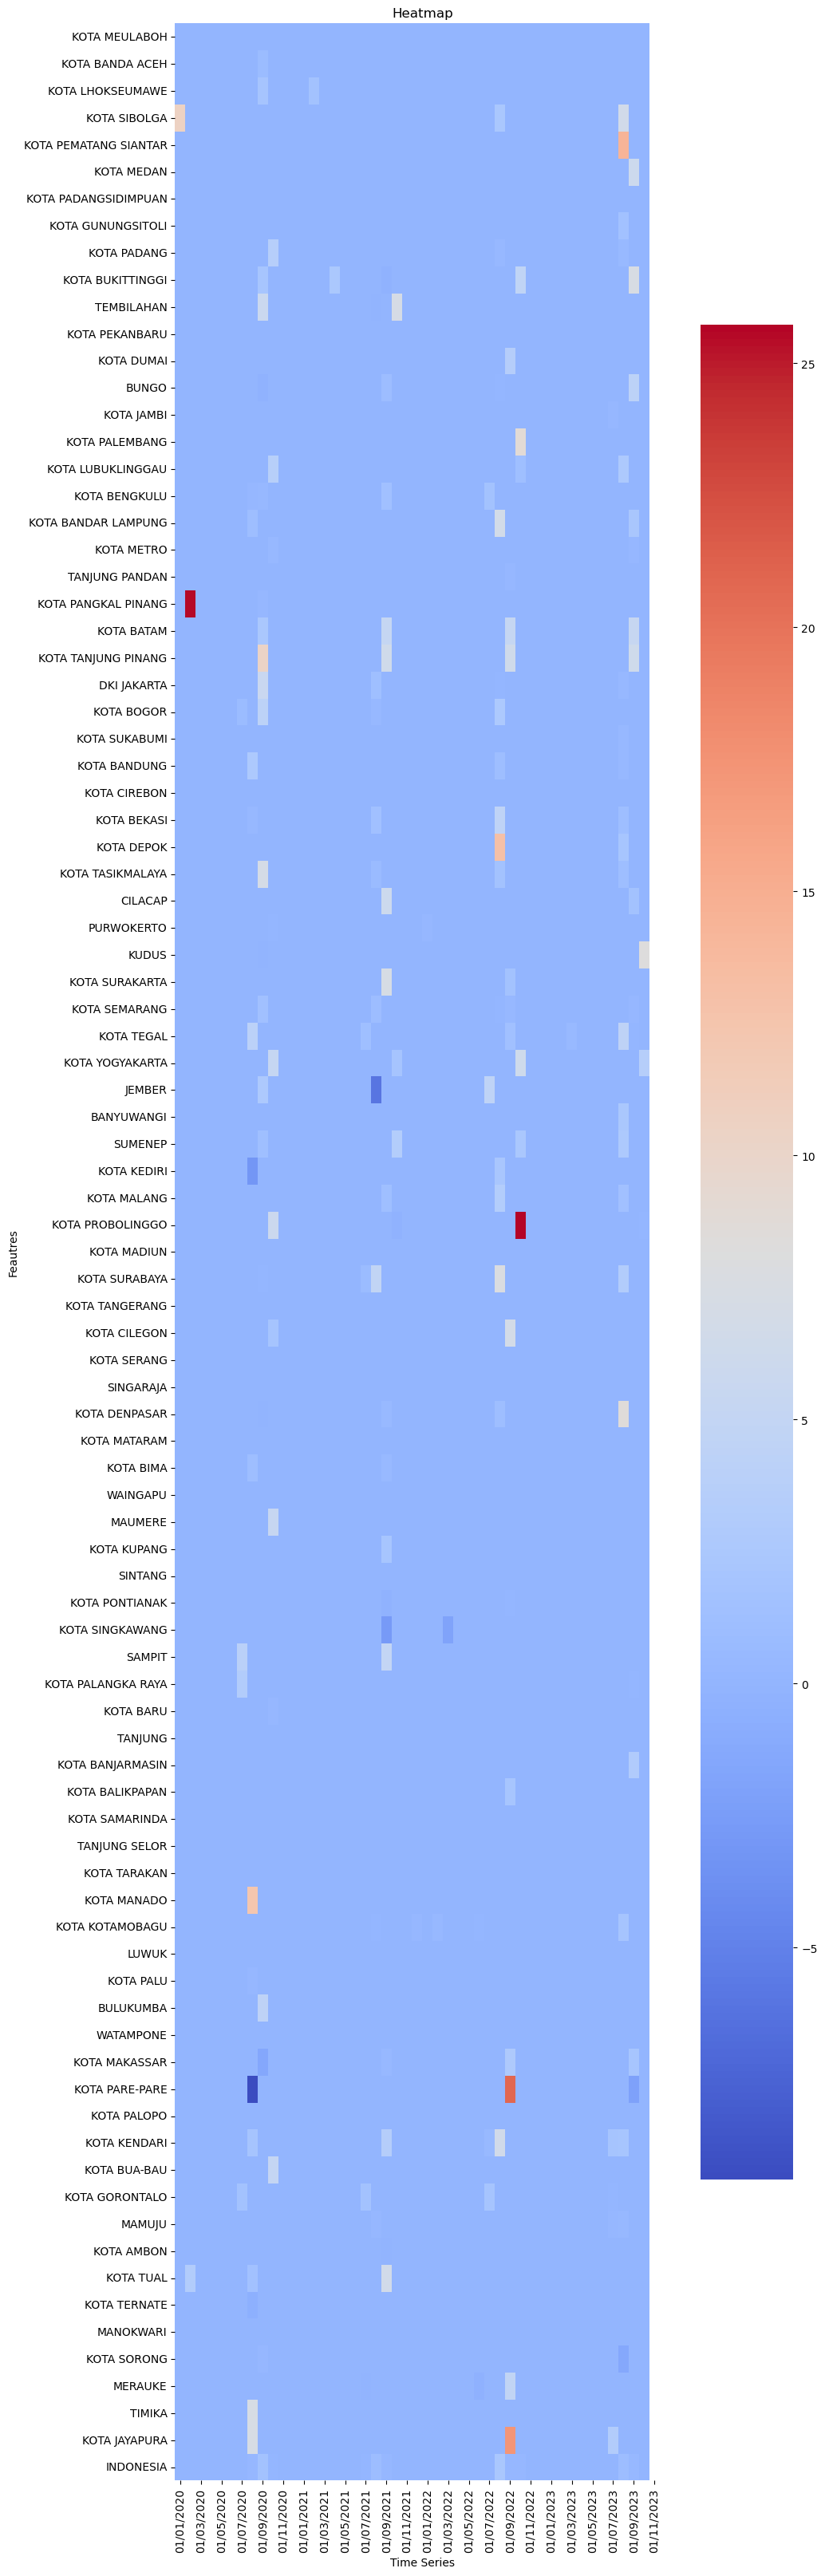

In [146]:
plt.figure(figsize=(10, 40))
sns.heatmap(df_ip_con_all_tinggi_2020_2023, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()


In [147]:

# Mengubah indeks menjadi kolom "Kota" menggunakan reset_index()
df_ip_con_all_tinggi_2020_2023_reset = df_ip_con_all_tinggi_2020_2023.reset_index()
df_ip_con_all_tinggi_2020_2023_reset.fillna(0,inplace=True)

# Mencetak DataFrame dengan indeks yang telah diubah menjadi kolom "Kota"
print(df_ip_con_all_tinggi_2020_2023_reset)

                     Kota  01/01/2020  01/02/2020  01/03/2020  01/04/2020  \
0           KOTA MEULABOH        0.00        0.00         0.0         0.0   
1         KOTA BANDA ACEH        0.00        0.00         0.0         0.0   
2        KOTA LHOKSEUMAWE        0.00        0.00         0.0         0.0   
3            KOTA SIBOLGA       10.52        0.00         0.0         0.0   
4   KOTA PEMATANG SIANTAR        0.00        0.00         0.0         0.0   
..                    ...         ...         ...         ...         ...   
86            KOTA SORONG        0.00        0.00         0.0         0.0   
87                MERAUKE        0.00        0.00         0.0         0.0   
88                 TIMIKA        0.00        0.00         0.0         0.0   
89          KOTA JAYAPURA        0.00        0.00         0.0         0.0   
90              INDONESIA        0.00        0.02         0.0         0.0   

    01/05/2020  01/06/2020  01/07/2020  01/08/2020  01/09/2020  ...  \
0   

In [148]:
kota_column_tinggi = df_ip_con_all_tinggi_2020_2023_reset['Kota']
print(kota_column_tinggi)

0             KOTA MEULABOH
1           KOTA BANDA ACEH
2          KOTA LHOKSEUMAWE
3              KOTA SIBOLGA
4     KOTA PEMATANG SIANTAR
              ...          
86              KOTA SORONG
87                  MERAUKE
88                   TIMIKA
89            KOTA JAYAPURA
90                INDONESIA
Name: Kota, Length: 91, dtype: object


# Concat Pendidikan Lainnya

In [149]:
df_ip_con_all_lainnya_2020_2023 = pd.concat([df_ip_lainnya_2020,df_ip_lainnya_2021,df_ip_lainnya_2022,df_ip_lainnya_2023],axis=1)
df_ip_con_all_lainnya_2020_2023

,01/01/2020,01/02/2020,01/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,01/08/2020,01/09/2020,01/10/2020,...,01/03/2023,01/04/2023,01/05/2023,01/06/2023,01/07/2023,01/08/2023,01/09/2023,01/10/2023,01/11/2023,01/12/2023
Kota,,,,,,,,,,,,,,,,,,,,,
KOTA MEULABOH,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,1.41,3.43,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
KOTA BANDA ACEH,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.83,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
KOTA LHOKSEUMAWE,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,1.87,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
KOTA SIBOLGA,10.52,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
KOTA PEMATANG SIANTAR,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOTA SORONG,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
MERAUKE,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.13,0.00,0.00,0.00,NaN,NaN
TIMIKA,0.00,0.00,0.0,0.0,0.0,0.0,0.00,7.29,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN


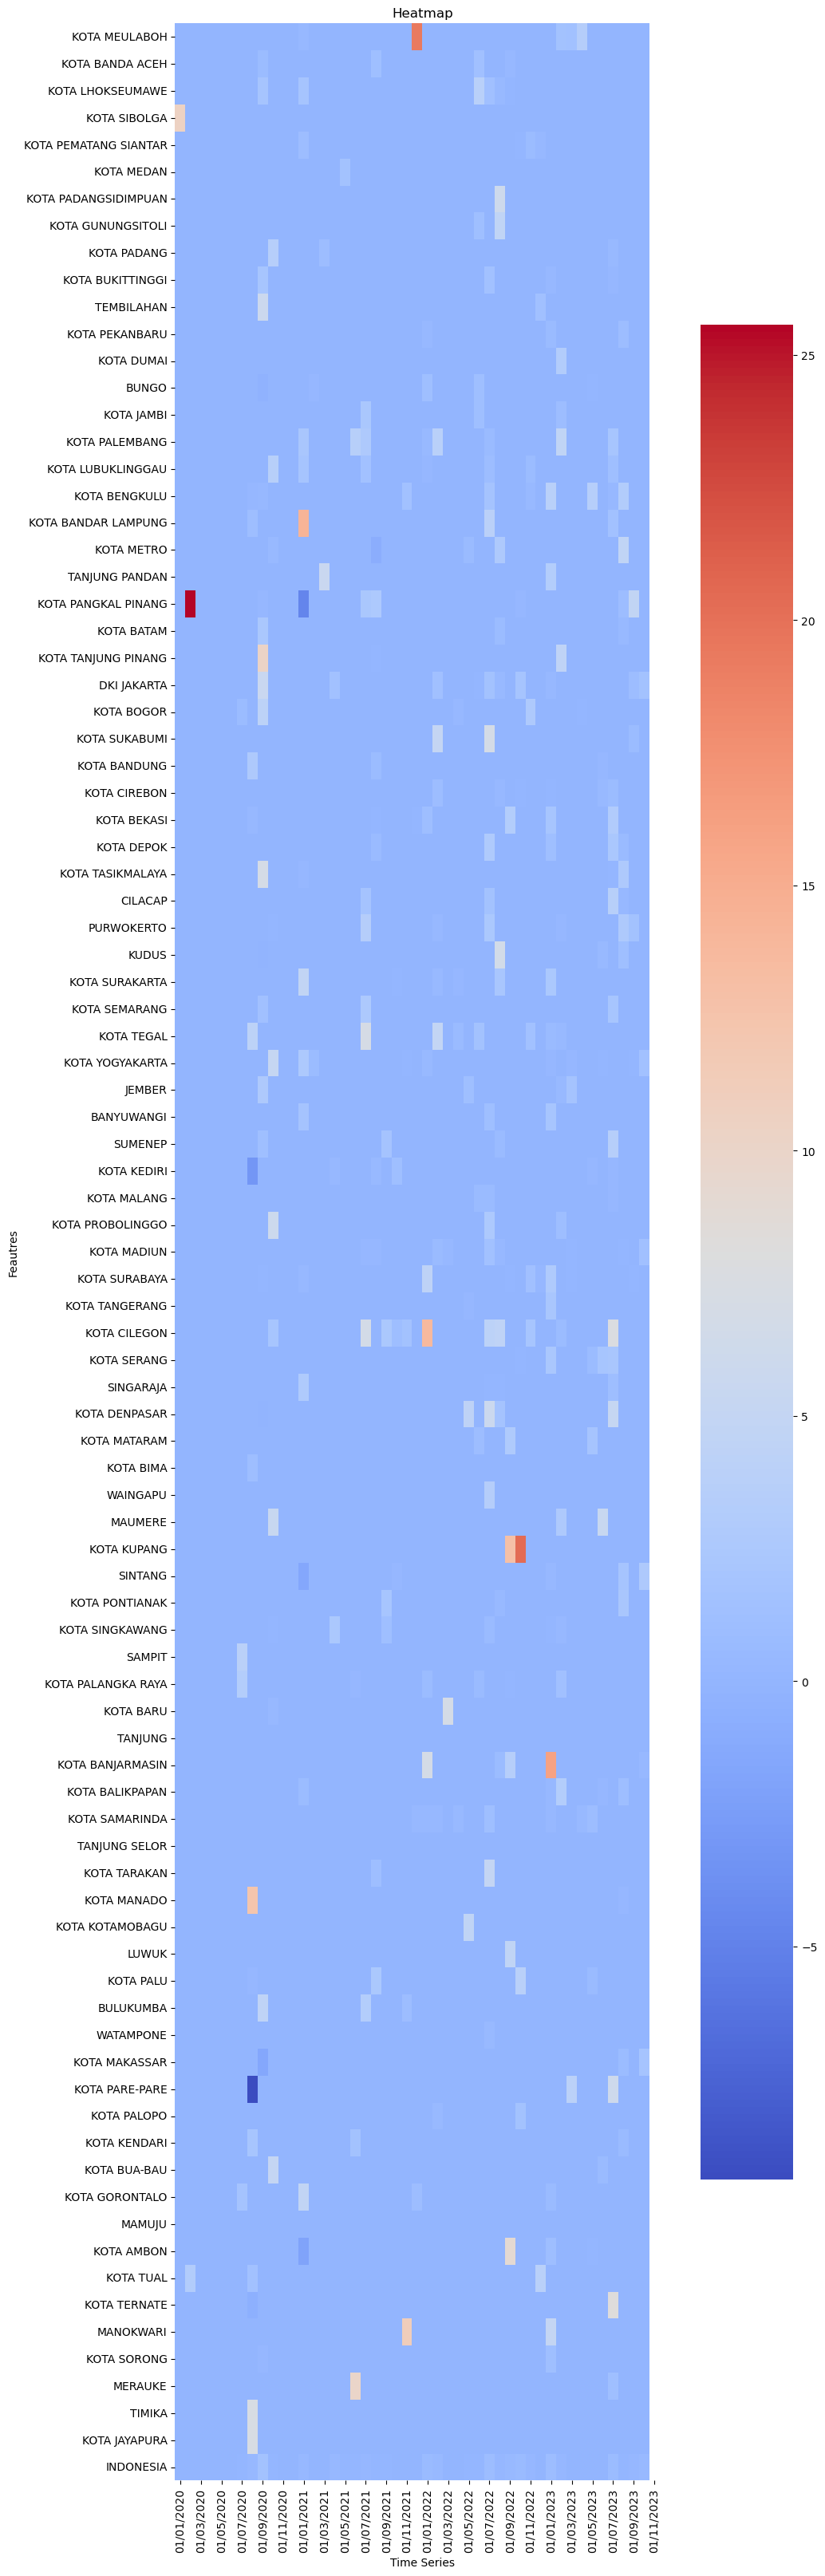

In [150]:
plt.figure(figsize=(10, 40))
sns.heatmap(df_ip_con_all_lainnya_2020_2023, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Time Series')
plt.ylabel('Feautres')
plt.show()

In [151]:

# Mengubah indeks menjadi kolom "Kota" menggunakan reset_index()
df_ip_con_all_lainnya_2020_2023_reset = df_ip_con_all_lainnya_2020_2023.reset_index()
df_ip_con_all_lainnya_2020_2023_reset.fillna(0,inplace=True)

# Mencetak DataFrame dengan indeks yang telah diubah menjadi kolom "Kota"
print(df_ip_con_all_lainnya_2020_2023_reset)

                     Kota  01/01/2020  01/02/2020  01/03/2020  01/04/2020  \
0           KOTA MEULABOH        0.00        0.00         0.0         0.0   
1         KOTA BANDA ACEH        0.00        0.00         0.0         0.0   
2        KOTA LHOKSEUMAWE        0.00        0.00         0.0         0.0   
3            KOTA SIBOLGA       10.52        0.00         0.0         0.0   
4   KOTA PEMATANG SIANTAR        0.00        0.00         0.0         0.0   
..                    ...         ...         ...         ...         ...   
86            KOTA SORONG        0.00        0.00         0.0         0.0   
87                MERAUKE        0.00        0.00         0.0         0.0   
88                 TIMIKA        0.00        0.00         0.0         0.0   
89          KOTA JAYAPURA        0.00        0.00         0.0         0.0   
90              INDONESIA        0.00        0.02         0.0         0.0   

    01/05/2020  01/06/2020  01/07/2020  01/08/2020  01/09/2020  ...  \
0   

In [152]:
kota_column_lainnya = df_ip_con_all_lainnya_2020_2023_reset['Kota']
print(kota_column_lainnya)

0             KOTA MEULABOH
1           KOTA BANDA ACEH
2          KOTA LHOKSEUMAWE
3              KOTA SIBOLGA
4     KOTA PEMATANG SIANTAR
              ...          
86              KOTA SORONG
87                  MERAUKE
88                   TIMIKA
89            KOTA JAYAPURA
90                INDONESIA
Name: Kota, Length: 91, dtype: object


In [153]:
X = df_ip_con_all_tinggi_2020_2023_reset.drop(columns=["Kota"], axis=1)


# Split Training Data

In [154]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [155]:
#DARI CHATGPT # RANDOMFOREST



# Buang features "Kota" dikarenakan akan menjadi target variabel
X_tinggi = df_ip_con_all_tinggi_2020_2023_reset.drop(columns=["Kota"], axis=1)
Y_tinggi = df_ip_con_all_tinggi_2020_2023_reset["Kota"]

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X_tinggi, Y_tinggi, test_size=0.2, random_state=42)

#### NICKNICK

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


X = df_ip_con_all_lainnya_2020_2023_reset.drop(columns=["Kota"], axis=1)
Y = df_ip_con_all_lainnya_2020_2023_reset["Kota"]
# print(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

# Random state sangat mempengaruhi hasil akhir, menggunakan 42 karena default parameter
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [157]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [158]:
Y_pred = rf_model.predict(X_test)

In [159]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Tampilkan hasil
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 1227.1906631578945
Mean Absolute Error (MAE): 30.530526315789476
R2 Score: -0.6025517985559459


In [160]:
# Skalakan fitur-fitur numerik
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Encoding data target
Y_train_encoded = label_encoder.fit_transform(Y_train)


In [161]:
# Inisialisasi model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, Y_train_encoded)

RandomForestClassifier(random_state=42)

In [162]:
# Lakukan prediksi menggunakan model
predict = model.predict(X_test)

In [163]:
# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Encoding data target
Y_test_encoded = label_encoder.fit_transform(Y_test)

# Hitung metrik evaluasi: MSE, MAE, dan R2 Score
mse = mean_squared_error(Y_test_encoded, predict)
mae = mean_absolute_error(Y_test_encoded, predict)
r2 = r2_score(Y_test_encoded, predict)

# Cetak metrik evaluasi
print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")


MSE : 2543.8947368421054
MAE : 43.26315789473684
R2 Score : -83.79649122807018


In [164]:
df_ip_con_all_lainnya_2020_2023_reset.dtypes

Kota           object
01/01/2020    float64
01/02/2020    float64
01/03/2020    float64
01/04/2020    float64
01/05/2020    float64
01/06/2020    float64
01/07/2020    float64
01/08/2020    float64
01/09/2020    float64
01/10/2020    float64
01/11/2020    float64
01/12/2020    float64
01/01/2021    float64
01/02/2021    float64
01/03/2021    float64
01/04/2021    float64
01/05/2021    float64
01/06/2021    float64
01/07/2021    float64
01/08/2021    float64
01/09/2021    float64
01/10/2021    float64
01/11/2021    float64
01/12/2021    float64
01/01/2022    float64
01/02/2022    float64
01/03/2022    float64
01/04/2022    float64
01/05/2022    float64
01/06/2022    float64
01/07/2022    float64
01/08/2022    float64
01/09/2022    float64
01/10/2022    float64
01/11/2022    float64
01/12/2022    float64
01/01/2023    float64
01/02/2023    float64
01/03/2023    float64
01/04/2023    float64
01/05/2023    float64
01/06/2023    float64
01/07/2023    float64
01/08/2023    float64
01/09/2023

In [165]:
#Pendidikan Tinggi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


X_tinggi = df_ip_con_all_tinggi_2020_2023_reset.drop(columns=["Kota"], axis=1)
Y_tinggi = df_ip_con_all_tinggi_2020_2023_reset["Kota"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y_tinggi)

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X_tinggi, y_encoded, test_size=0.2, random_state=42)



In [166]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)



RandomForestRegressor(random_state=42)

In [167]:





Y_pred = rf_model.predict(X_test)






mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Tampilkan hasil
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 920.4482678967005
Mean Absolute Error (MAE): 23.996467309092704
R2 Score: -0.2019860250564629


In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Encoding data target
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Setelah encoding, Anda dapat melatih model Linear Regression



model = LinearRegression()
model.fit(X_train, Y_train_encoded)

LinearRegression()

In [170]:
predict = model.predict(X_test)

In [171]:
# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Encoding data target
Y_test_encoded = label_encoder.fit_transform(Y_test)

print(Y_test_encoded)
print(Y_test)

[ 0  4 16 18  8 13  1 11 17 10 15 14  7  3  6  9  2  5 12]
[ 0 14 77 88 43 62  6 56 87 55 76 64 32 13 25 53 10 22 58]


In [172]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Setelah encoding, Anda dapat melakukan evaluasi model
mse = mean_squared_error(Y_test_encoded, predict)
mae = mean_absolute_error(Y_test_encoded, predict)
r2 = r2_score(Y_test_encoded, predict)


# mse = mean_squared_error(Y_test, predict)
# mae = mean_absolute_error(Y_test, predict)
# r2 = r2_score(Y_test, predict)
# df_mean = df["price"].mean()

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")
# print(f"Mean: {df_mean}")

MSE : 1169.4960791598578
MAE : 27.870358864088566
R2 Score : -37.98320263866193


In [173]:
#Pendidikan Lainnya
from sklearn.model_selection import train_test_split

# Buang features "hotwaterheating" dikarenakan korelasi rendah
X_lainnya = df_ip_con_all_lainnya_2020_2023_reset.drop(columns=["Kota"], axis= 1)
Y_lainnya = df_ip_con_all_lainnya_2020_2023_reset["Kota"]

# Random state sangant mempengaruhi hasil akhir, menggunakan 42 karena default parameter
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_lainnya, Y_lainnya, test_size = 0.2, random_state = 42)


In [174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)